In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.ndimage import uniform_filter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.optimize import fixed_point

In [2]:
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = plt.cycler("color", plt.cm.Dark2.colors)

In [3]:
list_t=np.round(np.arange(0, 2250, 50))

In [4]:
mat_PDE={}
for t in list_t:
    mat_PDE[t]=pd.read_csv('/home/invites/benvegnen/AI2D/data_PDE_2d_alex_2/%09d.snap'%t, sep='\t', skiprows=[1])

In [5]:
lx=8000#2100
f_m_micro=pd.read_csv('/users/invites/benvegnen/Thesis/AI2D/AI2D_on_lattice/destab_liqp_blob_films/data_prof_article_rho10/i1/f_profiles_m.dat', sep=' ', names=np.arange(lx), index_col=False)
f_rho_micro=pd.read_csv('/users/invites/benvegnen/Thesis/AI2D/AI2D_on_lattice/destab_liqp_blob_films/data_prof_article_rho10/i1/f_profiles_rho.dat', sep=' ', names=np.arange(lx), index_col=False)


In [6]:
m_micro={}
rho_micro={}
for k in range(45):
    m_micro[50*k]=-f_m_micro.values[600*k:600*(k+1),:][:,::-1]
    rho_micro[50*k]=f_rho_micro.values[600*k:600*(k+1),:][:,::-1]

In [7]:
m_PDE={}
rho_PDE={}

for t in list_t:
    m_PDE[t]=mat_PDE[t].m.values.reshape((12000,-1)).T
    rho_PDE[t]=mat_PDE[t].rho.values.reshape((12000,-1)).T

In [88]:
mat_PDE[0]

,#x,rho,m
0.00,0.000000,1.0,-0.957503
0.00,0.666667,1.0,-0.957504
0.00,1.333330,1.0,-0.957504
0.00,2.000000,1.0,-0.957503
0.00,2.666670,1.0,-0.957504
...,...,...,...
7999.33,596.667000,1.0,-0.957504
7999.33,597.333000,1.0,-0.957504
7999.33,598.000000,1.0,-0.957504
7999.33,598.667000,1.0,-0.957504


# $w(t)$ PDE vs micro

In [13]:
fig_width_pt = 123  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = fig_width_pt/golden_mean
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 12,
          'font.size': 12,
          'xtick.labelsize': 10,
          'xtick.direction': 'out',
          'ytick.labelsize': 10,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

In [8]:
w_pde=[]
w_micro=[]

for t in list_t:
    mat1=m_PDE[t]
    w_pde.append((2/3)*np.max(np.sum(mat1>0, axis=0))) #resolution is 2/3
    
    mat1=m_micro[t]
    w_micro.append(np.max(np.sum(mat1>0, axis=0)))

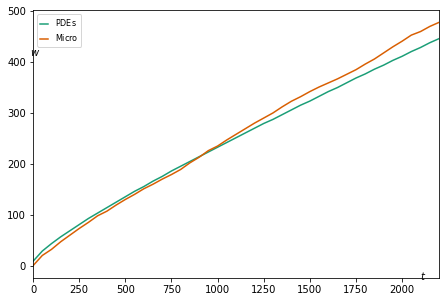

In [9]:
plt.plot(list_t, w_pde, '-', label=r'$\mathrm{PDEs}$')
plt.plot(list_t, w_micro, '-', label=r'$\mathrm{Micro}$', markersize=3)

plt.legend(fontsize=8, handlelength=1)
plt.xlabel(r'$t$', labelpad=-25, x=0.96, rotation=0, zorder=100);
plt.ylabel(r'$w$', labelpad=-28, y=0.82, rotation=0, zorder=100);

plt.xlim(0,2200)
plt.tight_layout(pad=0.01)
plt.savefig('w_PDE_vs_micro.pdf');

In [11]:
fixed_point(lambda x : np.tanh(2*x), 0.5)

NameError: name 'fixed_point' is not defined

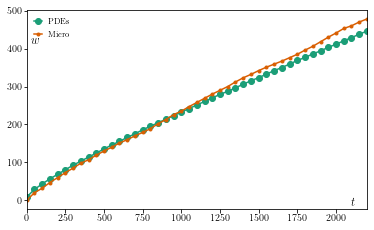

In [421]:
plt.figure(figsize=(5,3))
plt.plot(list_t, np.array(w_pde), 'o-', label=r'$\mathrm{PDEs}$')
plt.plot(list_t, w_micro, 'o-', label=r'$\mathrm{Micro}$', markersize=3)

plt.legend(fontsize=8, handlelength=1)
plt.xlabel(r'$t$', labelpad=-25, x=0.96, rotation=0, zorder=100);
plt.ylabel(r'$w$', labelpad=-28, y=0.82, rotation=0, zorder=100);



plt.xlim(0,2200)
plt.tight_layout(pad=0.01)


In [482]:
len(w_pde)

46

In [486]:
np.polyfit(np.arange(26), w_pde[20:], deg=1)

array([  8.87339031, 234.36467236])

In [489]:
np.polyfit(np.arange(25), w_micro[20:], deg=1)

array([ 10.02, 238.88])

In [422]:
w_pde[-2:]

[446.0, 455.3333333333333]

In [423]:
w_micro[-10:]

[385, 396, 406, 418, 430, 441, 453, 460, 470, 478]

In [424]:
np.where(np.int64(w_micro)==453)

(array([41]),)

In [99]:
mat_PDE[0]

,#x,rho,m
0.00,0.000000,1.0,-0.957503
0.00,0.666667,1.0,-0.957504
0.00,1.333330,1.0,-0.957504
0.00,2.000000,1.0,-0.957503
0.00,2.666670,1.0,-0.957504
...,...,...,...
7999.33,596.667000,1.0,-0.957504
7999.33,597.333000,1.0,-0.957504
7999.33,598.000000,1.0,-0.957504
7999.33,598.667000,1.0,-0.957504


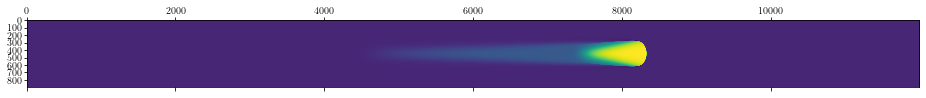

In [490]:
plt.matshow(mat_PDE[1000].m.values.reshape((12000,-1)).T)

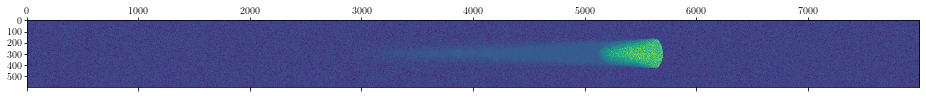

In [539]:
k=23
plt.matshow(-f_m_micro.values[600*k:600*(k+1),:][:,::-1])

# Back & front speed

In [121]:
posback_pde=[]
posfront_pde=[]
poscomet_pde=[]


posback_micro=[]
posfront_micro=[]
poscomet_micro=[]


for t in list_t[1:]:
#     prof=m_micro[t]
#     avg_prof=uniform_filter(prof, size=10, mode='constant')
#     prof_mid=avg_prof[300,:]
#     m_d=np.max(prof_mid)
#     m_0=np.min(prof_mid)
#     posback_micro.append(np.where((prof_mid<m_d/2)&(np.roll(prof_mid,-1)>=m_d/2))[0][0])
#     #posfront_micro.append(np.where((prof_mid>m_d/2)&(np.roll(prof_mid,-1)<=m_d/2))[0][0])
#     posfront_micro.append(np.where((prof_mid>10)&(np.roll(prof_mid,-1)<=10))[0][0])
 
    prof=rho_PDE[t]
    prof_mid=prof[450,:]
    m_d=np.max(prof_mid)
    m_0=np.min(prof_mid)
    #posback_pde.append((2/3)*np.where((prof_mid<m_d/2)&(np.roll(prof_mid,-1)>=m_d/2))[0][0])
    #posfront_pde.append((2/3)*np.where((prof_mid>m_d/2)&(np.roll(prof_mid,-1)<=m_d/2))[0][0])
    #poscomet_pde.append((2/3)*np.where((prof_mid<0.95*(-0.9575030000000001))&(np.roll(prof_mid,-1)>=0.95*(-0.9575030000000001)))[0][0])
    poscomet_pde.append((2/3)*np.where((prof_mid>1/2)&(np.roll(prof_mid,-1)<=1/2))[0][0])
   

In [128]:
poscomet_pde=np.array(poscomet_pde)
poscomet_pde

array([3966.        , 3948.        , 3928.        , 3905.33333333,
       3880.        , 3853.33333333, 3824.66666667, 3796.        ,
       3766.        , 3735.33333333, 3704.        , 3672.        ,
       3640.        , 3607.33333333, 3574.66666667, 3540.66666667,
       3507.33333333, 3473.33333333, 3439.33333333, 3404.66666667,
       3370.        , 3335.33333333, 3300.        , 3265.33333333,
       3230.        , 3194.        , 3158.66666667, 3122.66666667,
       3086.66666667, 3050.66666667, 3014.        , 2978.        ,
       2941.33333333, 2904.66666667, 2868.        , 2831.33333333,
       2794.        , 2757.33333333, 2720.        , 2683.33333333,
       2646.        , 2608.66666667, 2570.66666667, 2533.33333333])

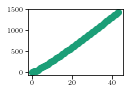

In [123]:
plt.plot(-poscomet_pde+poscomet_pde[0], 'o-')

In [132]:
data=np.zeros((list_t[1:].shape[0],2))

In [134]:
data[:,0]=list_t[1:]
data

array([[  50.,    0.],
       [ 100.,    0.],
       [ 150.,    0.],
       [ 200.,    0.],
       [ 250.,    0.],
       [ 300.,    0.],
       [ 350.,    0.],
       [ 400.,    0.],
       [ 450.,    0.],
       [ 500.,    0.],
       [ 550.,    0.],
       [ 600.,    0.],
       [ 650.,    0.],
       [ 700.,    0.],
       [ 750.,    0.],
       [ 800.,    0.],
       [ 850.,    0.],
       [ 900.,    0.],
       [ 950.,    0.],
       [1000.,    0.],
       [1050.,    0.],
       [1100.,    0.],
       [1150.,    0.],
       [1200.,    0.],
       [1250.,    0.],
       [1300.,    0.],
       [1350.,    0.],
       [1400.,    0.],
       [1450.,    0.],
       [1500.,    0.],
       [1550.,    0.],
       [1600.,    0.],
       [1650.,    0.],
       [1700.,    0.],
       [1750.,    0.],
       [1800.,    0.],
       [1850.,    0.],
       [1900.,    0.],
       [1950.,    0.],
       [2000.,    0.],
       [2050.,    0.],
       [2100.,    0.],
       [2150.,    0.],
       [220

In [135]:
data[:,1]=poscomet_pde-poscomet_pde[0]
data

array([[   50.        ,     0.        ],
       [  100.        ,   -18.        ],
       [  150.        ,   -38.        ],
       [  200.        ,   -60.66666667],
       [  250.        ,   -86.        ],
       [  300.        ,  -112.66666667],
       [  350.        ,  -141.33333333],
       [  400.        ,  -170.        ],
       [  450.        ,  -200.        ],
       [  500.        ,  -230.66666667],
       [  550.        ,  -262.        ],
       [  600.        ,  -294.        ],
       [  650.        ,  -326.        ],
       [  700.        ,  -358.66666667],
       [  750.        ,  -391.33333333],
       [  800.        ,  -425.33333333],
       [  850.        ,  -458.66666667],
       [  900.        ,  -492.66666667],
       [  950.        ,  -526.66666667],
       [ 1000.        ,  -561.33333333],
       [ 1050.        ,  -596.        ],
       [ 1100.        ,  -630.66666667],
       [ 1150.        ,  -666.        ],
       [ 1200.        ,  -700.66666667],
       [ 1250.  

In [113]:
data[:,1]=poscomet_pde-poscomet_pde[0]
data

array([[   50.        ,     0.        ],
       [  100.        ,   -50.66666667],
       [  150.        ,  -100.        ],
       [  200.        ,  -148.66666667],
       [  250.        ,  -196.66666667],
       [  300.        ,  -244.66666667],
       [  350.        ,  -292.66666667],
       [  400.        ,  -340.66666667],
       [  450.        ,  -388.        ],
       [  500.        ,  -436.        ],
       [  550.        ,  -483.33333333],
       [  600.        ,  -530.66666667],
       [  650.        ,  -578.66666667],
       [  700.        ,  -626.        ],
       [  750.        ,  -673.33333333],
       [  800.        ,  -721.33333333],
       [  850.        ,  -768.66666667],
       [  900.        ,  -816.        ],
       [  950.        ,  -863.33333333],
       [ 1000.        ,  -911.33333333],
       [ 1050.        ,  -958.66666667],
       [ 1100.        , -1006.        ],
       [ 1150.        , -1053.33333333],
       [ 1200.        , -1100.66666667],
       [ 1250.  

In [136]:
np.savetxt('data_fig2d_pde_x_m_rho0.dat', data, header='t x_-')

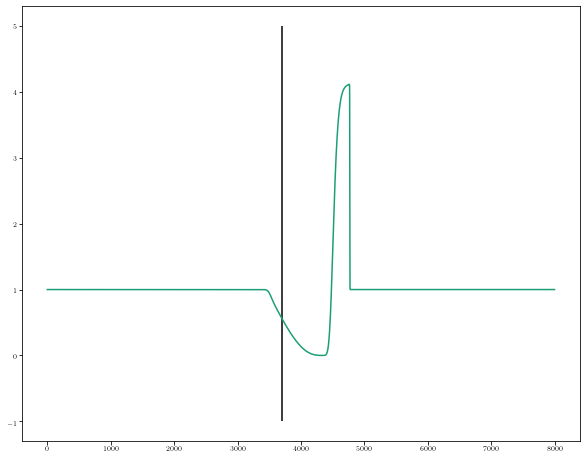

In [131]:
plt.figure(figsize=(10,8))
t=list_t[10]
prof=rho_PDE[t]
prof_mid=prof[450,:]
plt.plot((2/3)*np.arange(prof_mid.shape[0]), prof_mid)

plt.vlines(poscomet_pde[10], -1,5)

In [104]:
prof_mid[0]

-0.9575030000000001

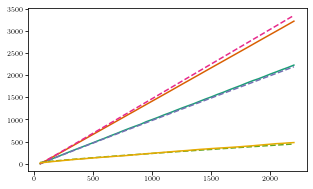

In [96]:
plt.figure(figsize=(5,3))

plt.plot(list_t[1:], np.array(posback_micro-posback_micro[0]))
plt.plot(list_t[1:], np.array(posfront_micro-posfront_micro[0]))

plt.plot(list_t[1:], posback_pde-posback_pde[0], '--')
plt.plot(list_t[1:], np.array(posfront_pde-posfront_pde[0]), '--')

plt.plot(list_t[1:], np.array(w_pde)[1:], '--', label=r'$\mathrm{PDEs}$')
plt.plot(list_t[1:], w_micro[1:], '-', label=r'$\mathrm{Micro}$', markersize=3)


In [12]:
u_micro=np.array(posfront_micro-posfront_micro[0])-np.array(posback_micro-posback_micro[0])
u_pde=np.array(posfront_pde-posfront_pde[0])-np.array(posback_pde-posback_pde[0])

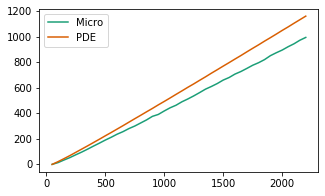

In [13]:
plt.figure(figsize=(5,3))

plt.plot(list_t[1:], u_micro, label='Micro')
plt.plot(list_t[1:], u_pde, label='PDE')
plt.legend()

In [571]:
len(u_micro)

44

In [572]:
44*50

2200

In [570]:
np.where(u_pde==992)

(array([37]),)

# Cut $m=0$ PDE vs micro

In [22]:
fig_width_pt = 123  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = fig_width_pt/golden_mean
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 12,
          'font.size': 12,
          'xtick.labelsize': 10,
          'xtick.direction': 'out',
          'ytick.labelsize': 10,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

In [14]:
t_pde=2200
t_micro=41*50

mat_micro_rho=rho_micro[t_micro]
mat_micro_m=m_micro[t_micro]
mat_pde_rho=rho_PDE[t_pde]
mat_pde_m=m_PDE[t_pde]

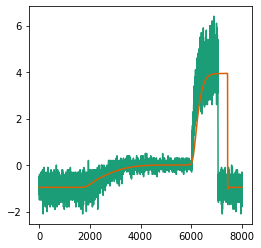

In [15]:
plt.figure(figsize=(4,4))
plt.plot(np.arange(mat_micro_m[300,:].shape[0]), mat_micro_m[300,:]/10)

plt.plot((2/3)*np.arange(12000), mat_pde_m[450,:])
#plt.plot((2/3)*np.arange(12000), mat_pde_rho[450,:])

#<plt.xlim(4000, 6000)


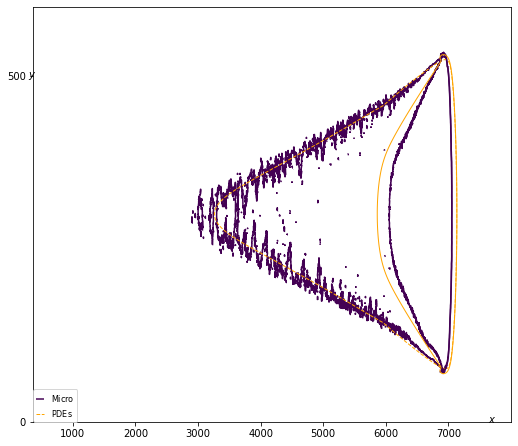

In [16]:
plt.figure(figsize=(7,6))

xmin=1000
xmax=8000
xlist = np.arange(xmin, xmax)
ylist = np.arange(0, 600)
X, Y = np.meshgrid(xlist, ylist)

avg_prof=uniform_filter(mat_micro_m, size=5, mode='constant')

Z = avg_prof[:,xmin:xmax]

cp = plt.contour(X, Y, Z, levels=[-1])
plt.clabel(cp, fontsize=1, inline=False, fmt='%d')
labels = [r'$\mathrm{Micro}$']
for i in range(len(labels)):
    cp.collections[i].set_label(labels[i])

Xshift=300

xmin=1000
xmax=12000
xlist = np.arange(xmin, xmax)*(2./3)
ylist = np.arange(0, 900)*(2./3)
X, Y = np.meshgrid(xlist, ylist)
Z = mat_pde_m[:,xmin:xmax]
cp = plt.contour(X-Xshift, Y, Z, levels=[-1e-1], colors='orange', linewidths=1)

plt.clabel(cp, fontsize=1, inline=False, fmt='%d')
labels = [r'$\mathrm{PDEs}$']
for i in range(len(labels)):
    cp.collections[i].set_label(labels[i])

# #DENS
xmin=1000
xmax=8000
xlist = np.arange(xmin, xmax)
ylist = np.arange(0, 600)
X, Y = np.meshgrid(xlist, ylist)

avg_prof=uniform_filter(mat_micro_rho, size=5, mode='constant')

Z = avg_prof[:,xmin:xmax]
cp = plt.contour(X, Y, Z, levels=[12])

xmin=1000
xmax=12000
xlist = np.arange(xmin, xmax)*(2./3)
ylist = np.arange(0, 900)*(2./3)
X, Y = np.meshgrid(xlist, ylist)
Z = mat_pde_rho[:,xmin:xmax]
cp = plt.contour(X-Xshift, Y, Z, levels=[1.2], colors='orange', linewidths=1)


plt.legend(fontsize=8, handlelength=1, loc=(0.,0.))
plt.xlabel(r'$x$', labelpad=-24, x=0.96, rotation=0, zorder=100);
plt.ylabel(r'$y$', labelpad=-25, y=0.82, rotation=0, zorder=100);

plt.yticks((0,500))

#plt.xlim(600,1800)
plt.tight_layout(pad=0.01)
#plt.savefig('iso_m_PDE_vs_micro_asympt.pdf');

## Early profile

TypeError: Shape of x does not match that of z: found (500, 1100) instead of (600, 1100).

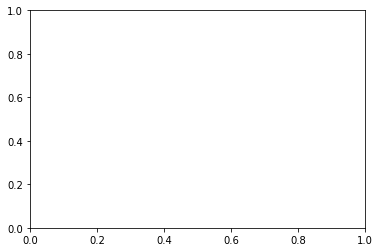

In [17]:
xmin=1000
xmax=2100
xlist = np.arange(xmin, xmax)
ylist = np.arange(0, 500)
X, Y = np.meshgrid(xlist, ylist)

avg_prof=uniform_filter(mat_micro_m, size=5, mode='constant')

Z = avg_prof[:,xmin:xmax]

cp = plt.contour(X, Y, Z, levels=[-1])
plt.clabel(cp, fontsize=1, inline=False, fmt='%d')
labels = [r'$\mathrm{Micro}$']
for i in range(len(labels)):
    cp.collections[i].set_label(labels[i])


xmin=6000
xmax=8000
xlist = np.arange(xmin, xmax)*(2./3)
ylist = np.arange(0, 900)*(2./3)
X, Y = np.meshgrid(xlist, ylist)
Z = mat_pde_m[:,xmin:xmax]
cp = plt.contour(X-3259, Y-50, Z, levels=[-1e-1], colors='orange', linewidths=0.6)

plt.clabel(cp, fontsize=1, inline=False, fmt='%d')
labels = [r'$\mathrm{PDEs}$']
for i in range(len(labels)):
    cp.collections[i].set_label(labels[i])

# #DENS

xmin=0
xmax=2100
xlist = np.arange(xmin, xmax)
ylist = np.arange(0, 500)
X, Y = np.meshgrid(xlist, ylist)

avg_prof=uniform_filter(mat_micro_rho, size=5, mode='constant')

Z = avg_prof[:,xmin:xmax]
cp = plt.contour(X, Y, Z, levels=[12])

xmin=0
xmax=8000
xlist = np.arange(xmin, xmax)*(2./3)
ylist = np.arange(0, 900)*(2./3)
X, Y = np.meshgrid(xlist, ylist)
Z = mat_pde_rho[:,xmin:xmax]
cp = plt.contour(X-3260, Y-50, Z, levels=[1.2], colors='orange', linewidths=0.6)


plt.legend(fontsize=8, handlelength=1, loc=(0.,0.))
plt.xlabel(r'$x$', labelpad=-24, x=0.96, rotation=0, zorder=100);
plt.ylabel(r'$y$', labelpad=-25, y=0.82, rotation=0, zorder=100);

plt.yticks((0,500))

plt.xlim(600,1800)
plt.tight_layout(pad=0.01)
plt.savefig('iso_m_PDE_vs_micro.pdf');

# Snapshot PDE

In [22]:
fig_width_pt = 246  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = fig_width_pt/3
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'xtick.labelsize': 7,
          'xtick.direction': 'out',
          'ytick.labelsize': 7,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

In [23]:
mat_pde_m=mat_PDE[1000].m.values.reshape((12000,-1)).T

In [24]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


top = cm.get_cmap('PuBu_r', 100*128)
bottom = cm.get_cmap('YlOrBr', 100*128)
middle = (1,1,1,1)
newcolors = np.vstack((top(np.linspace(0, 1, 100*38)),
                       bottom(np.linspace(0, 1, 100*128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

/users/invites/benvegnen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


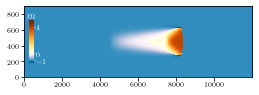

In [25]:
pcm=plt.imshow(mat_pde_m, cmap=newcmp, aspect='auto', vmin=-1.5, vmax=5, origin='lower')

inset_ax = inset_axes(plt.gca(),
                          height="61%", # set height
                          width="2.54%", # and width
                          loc=6,
                          #bbox_to_anchor=(75,130, 100, 100)
                     )

cbar=plt.colorbar(pcm, fraction=0.1, ticks=[-1, 0, +4], cax = inset_ax, 
                  orientation='vertical',
                    drawedges=False)

cbar.outline.set_visible(False)
cbar.ax.tick_params(size=1, color='w')
cbar_yticks = plt.getp(cbar.ax.axes, 'yticklabels')
plt.setp(cbar_yticks, color='w')

cbar.ax.set_ylabel(r'$m$', rotation=0, labelpad=-15, y=1.2, color="w")
plt.tight_layout(pad=0.01)

#plt.savefig('snapshot_PDE.pdf', dpi=1000);


# Panel Fig. 2

In [26]:
fig_width_pt = 246  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = fig_width_pt/1.4
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'xtick.labelsize': 7,
          'xtick.direction': 'out',
          'ytick.labelsize': 7,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

In [27]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


top = cm.get_cmap('PuBu_r', 100*128)
bottom = cm.get_cmap('YlOrBr', 100*128)
middle = (1,1,1,1)
newcolors = np.vstack((top(np.linspace(0, 1, 100*16)),
                       bottom(np.linspace(0, 1, 100*128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

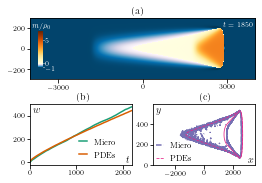

In [39]:
xlab=0.45
ylab=1.06

########### PDE Profile #########
ax=plt.subplot(211)
plt.text(s=r'$\mathrm{(a)}$', x=xlab, y=ylab, transform=plt.gca().transAxes)

t=1850
mat_pde_m=mat_PDE[t].m.values.reshape((12000,-1)).T
extent=[-mat_pde_m.shape[1]/2., mat_pde_m.shape[1]/2., -mat_pde_m.shape[0]/2., mat_pde_m.shape[0]/2. ]

pcm=plt.imshow(mat_pde_m, cmap=newcmp, aspect='auto', vmin=-1., vmax=7, extent=extent)

xtime=4300
ytime=320
plt.text(x=xtime, y=ytime, s=r'$t=%d$'%t, fontsize=7, color="w")

vx0=4500
plt.xticks([-vx0, 0, vx0], [r'$%d$'%np.int64(-2/3*vx0), r'$%d$'%0, r'$%d$'%np.int64(2/3*vx0)])

vy0=300
plt.yticks([-vy0, 0, vy0], [r'$%d$'%np.int64(-2/3*vy0), r'$%d$'%0, r'$%d$'%np.int64(2/3*vy0)])

inset_ax = inset_axes(ax,
                          height="61%", # set height
                          width="2.54%", # and width
                          loc=6,
                          bbox_to_anchor=(20,100,200,60)
                     )

cbar=plt.colorbar(pcm, fraction=0.2, ticks=[-1, 0, +5], cax = inset_ax, 
                  orientation='vertical',
                    drawedges=False)

cbar.outline.set_visible(False)
cbar.ax.tick_params(size=1, color='w')
cbar_yticks = plt.getp(cbar.ax.axes, 'yticklabels')
plt.setp(cbar_yticks, color='w')

cbar.ax.set_ylabel(r'${m}/{\rho_0}$', rotation=0, labelpad=-14, y=1.2, color="w", fontsize=7)

########### w(t) #########
plt.subplot(223)
plt.text(s=r'$\mathrm{(b)}$', x=xlab, y=ylab, transform=plt.gca().transAxes)

plt.plot(50*np.arange(45), w_micro, '-', label=r'$\mathrm{Micro}$', markersize=3)

plt.plot(list_t, w_pde, '-', label=r'$\mathrm{PDEs}$')

plt.legend(fontsize=8, handlelength=1, loc=(0.45,0.05))
plt.xlabel(r'$t$', labelpad=-20, x=0.96, rotation=0, zorder=100);
plt.ylabel(r'$w$', labelpad=-23, y=0.83, rotation=0, zorder=100);

plt.xlim(0,2200)

########### CONTOURS #########
t_pde=2200
t_micro=41*50

mat_micro_rho=rho_micro[t_micro]
mat_micro_m=m_micro[t_micro]
mat_pde_rho=rho_PDE[t_pde]
mat_pde_m=m_PDE[t_pde]
Xshift=-300


color_micro=plt.get_cmap('Dark2')(0.25)
color_PDE=plt.get_cmap('Dark2')(0.39)
plt.subplot(224)
plt.text(s=r'$\mathrm{(c)}$', x=xlab, y=ylab, transform=plt.gca().transAxes)

xmin=1000
xmax=8000
xlist = np.arange(xmin, xmax)
ylist = np.arange(0, 600)
X, Y = np.meshgrid(xlist, ylist)

avg_prof=uniform_filter(mat_micro_m, size=5, mode='constant')

Z = avg_prof[:,xmin:xmax]

cp = plt.contour(X, Y, Z, levels=[-1], colors=[color_micro])
plt.clabel(cp, fontsize=1, inline=False, fmt='%d')
labels = [r'$\mathrm{Micro}$']
for i in range(len(labels)):
    cp.collections[i].set_label(labels[i])


xmin=1000
xmax=12000
xlist = np.arange(xmin, xmax)*(2./3)
ylist = np.arange(0, 900)*(2./3)
X, Y = np.meshgrid(xlist, ylist)
Z = mat_pde_m[:,xmin:xmax]
cp = plt.contour(X+Xshift, Y, Z, levels=[-1e-1], colors=[color_PDE], linewidths=0.8)

plt.clabel(cp, fontsize=1, inline=False, fmt='%d')
labels = [r'$\mathrm{PDEs}$']
for i in range(len(labels)):
    cp.collections[i].set_label(labels[i])

# #DENS
xmin=1000
xmax=8000
xlist = np.arange(xmin, xmax)
ylist = np.arange(0, 600)
X, Y = np.meshgrid(xlist, ylist)

avg_prof=uniform_filter(mat_micro_rho, size=5, mode='constant')

Z = avg_prof[:,xmin:xmax]
cp = plt.contour(X, Y, Z, levels=[12], colors=[color_micro])

xmin=1000
xmax=12000
xlist = np.arange(xmin, xmax)*(2./3)
ylist = np.arange(0, 900)*(2./3)
X, Y = np.meshgrid(xlist, ylist)
Z = mat_pde_rho[:,xmin:xmax]
cp = plt.contour(X+Xshift, Y, Z, levels=[1.2], colors=[color_PDE], linewidths=0.8)


plt.legend(fontsize=8, handlelength=1, loc=(0.,0.))
plt.xlabel(r'$x$', labelpad=-20, x=0.96, rotation=0, zorder=100);
plt.ylabel(r'$y$', labelpad=-22, y=0.82, rotation=0, zorder=100);

xmid=4500
list_xticks=[2500, 4500, 6500]
list_xshifted=np.array(list_xticks)-xmid
plt.xticks(list_xticks, [r"$%d$"%a for a in list_xshifted])
plt.xlim(1000, 8000)

plt.subplots_adjust(hspace=0.4, wspace=0.2, left=0.07, right=0.99, top=0.92, bottom=0.08)

plt.savefig('panel_fig2_v1.pdf', dpi=400);

## Fronts pos

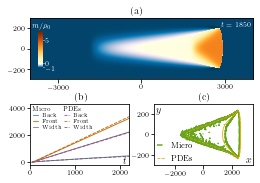

In [40]:
xlab=0.45
ylab=1.06

########### PDE Profile #########
ax=plt.subplot(211)
plt.text(s=r'$\mathrm{(a)}$', x=xlab, y=ylab, transform=plt.gca().transAxes)

t=1850
mat_pde_m=mat_PDE[t].m.values.reshape((12000,-1)).T
extent=[-mat_pde_m.shape[1]/2., mat_pde_m.shape[1]/2., -mat_pde_m.shape[0]/2., mat_pde_m.shape[0]/2. ]

pcm=plt.imshow(mat_pde_m, cmap=newcmp, aspect='auto', vmin=-1., vmax=7, extent=extent)

xtime=4300
ytime=320
plt.text(x=xtime, y=ytime, s=r'$t=%d$'%t, fontsize=7, color="w")

vx0=4500
plt.xticks([-vx0, 0, vx0], [r'$%d$'%np.int64(-2/3*vx0), r'$%d$'%0, r'$%d$'%np.int64(2/3*vx0)])

vy0=300
plt.yticks([-vy0, 0, vy0], [r'$%d$'%np.int64(-2/3*vy0), r'$%d$'%0, r'$%d$'%np.int64(2/3*vy0)])

inset_ax = inset_axes(ax,
                          height="61%", # set height
                          width="2.54%", # and width
                          loc=6,
                          bbox_to_anchor=(25,100,200,60)
                     )

cbar=plt.colorbar(pcm, fraction=0.2, ticks=[-1, 0, +5], cax = inset_ax, 
                  orientation='vertical',
                    drawedges=False)

cbar.outline.set_visible(False)
cbar.ax.tick_params(size=1, color='w')
cbar_yticks = plt.getp(cbar.ax.axes, 'yticklabels')
plt.setp(cbar_yticks, color='w')

cbar.ax.set_ylabel(r'${m}/{\rho_0}$', rotation=0, labelpad=-14, y=1.2, color="w", fontsize=7)

########### w(t) #########
plt.subplot(223)
lw=0.9
plt.text(s=r'$\mathrm{(b)}$', x=xlab, y=ylab, transform=plt.gca().transAxes)

plt.plot(list_t[1:], np.array(posback_micro-posback_micro[0]), label=r'${\rm Back}$', linewidth=lw)
plt.plot(list_t[1:], np.array(posfront_micro-posfront_micro[0]), label=r'${\rm Front}$', linewidth=lw)
plt.plot(list_t[1:], w_micro[1:], '-', label=r'${\rm Width}$', linewidth=lw)

plt.plot(list_t[1:], posback_pde-posback_pde[0], '--', label=r'${\rm Back}$', linewidth=lw)
plt.plot([],[])
plt.plot([],[])
plt.plot(list_t[1:], np.array(posfront_pde-posfront_pde[0]), '--', label=r'${\rm Front}$', linewidth=lw)
plt.plot(list_t[1:], np.array(w_pde)[1:], '--', label=r'${\rm Width}$', linewidth=lw)


fs=6
ycat=0.89
plt.annotate(s=r'${\rm Micro}$', xy=(0.02, ycat), fontsize=fs, xycoords='axes fraction')
plt.annotate(s=r'${\rm PDEs}$', xy=(0.33, ycat), fontsize=fs, xycoords='axes fraction')

leg=plt.legend(fontsize=fs-1, handlelength=1.1, loc=(0.01,0.55), labelspacing=0.2, ncol=2, columnspacing=0.5)
for line in leg.get_lines():
    line.set_linewidth(0.8)
plt.xlabel(r'$t$', labelpad=-19, x=0.96, rotation=0, zorder=100);
#plt.ylabel(r'$w$', labelpad=-25, y=0.83, rotation=0, zorder=100);

plt.xlim(0,2200)
plt.ylim(-200,4300)


########### CONTOURS #########
t_pde=2200
t_micro=41*50

mat_micro_rho=rho_micro[t_micro]
mat_micro_m=m_micro[t_micro]
mat_pde_rho=rho_PDE[t_pde]
mat_pde_m=m_PDE[t_pde]
Xshift=-300


color_micro=plt.get_cmap('Dark2')(0.51)
color_PDE=plt.get_cmap('Dark2')(0.63)
plt.subplot(224)
plt.text(s=r'$\mathrm{(c)}$', x=xlab, y=ylab, transform=plt.gca().transAxes)

xmin=1000
xmax=8000
xlist = np.arange(xmin, xmax)
ylist = np.arange(0, 600)
X, Y = np.meshgrid(xlist, ylist)

avg_prof=uniform_filter(mat_micro_m, size=5, mode='constant')

Z = avg_prof[:,xmin:xmax]

cp = plt.contour(X, Y, Z, levels=[-1], colors=[color_micro])
plt.clabel(cp, fontsize=1, inline=False, fmt='%d')
labels = [r'$\mathrm{Micro}$']
for i in range(len(labels)):
    cp.collections[i].set_label(labels[i])


xmin=1000
xmax=12000
xlist = np.arange(xmin, xmax)*(2./3)
ylist = np.arange(0, 900)*(2./3)
X, Y = np.meshgrid(xlist, ylist)
Z = mat_pde_m[:,xmin:xmax]
cp = plt.contour(X+Xshift, Y, Z, levels=[-1e-1], colors=[color_PDE], linewidths=0.8)

plt.clabel(cp, fontsize=1, inline=False, fmt='%d')
labels = [r'$\mathrm{PDEs}$']
for i in range(len(labels)):
    cp.collections[i].set_label(labels[i])

# #DENS
xmin=1000
xmax=8000
xlist = np.arange(xmin, xmax)
ylist = np.arange(0, 600)
X, Y = np.meshgrid(xlist, ylist)

avg_prof=uniform_filter(mat_micro_rho, size=5, mode='constant')

Z = avg_prof[:,xmin:xmax]
cp = plt.contour(X, Y, Z, levels=[12], colors=[color_micro])

xmin=1000
xmax=12000
xlist = np.arange(xmin, xmax)*(2./3)
ylist = np.arange(0, 900)*(2./3)
X, Y = np.meshgrid(xlist, ylist)
Z = mat_pde_rho[:,xmin:xmax]
cp = plt.contour(X+Xshift, Y, Z, levels=[1.2], colors=[color_PDE], linewidths=0.8)


plt.legend(fontsize=8, handlelength=1, loc=(0.,0.))
plt.xlabel(r'$x$', labelpad=-20, x=0.96, rotation=0, zorder=100);
plt.ylabel(r'$y$', labelpad=-27, y=0.83, rotation=0, zorder=100);

xmid=4500
list_xticks=[2500, 4500, 6500]
list_xshifted=np.array(list_xticks)-xmid
plt.xticks(list_xticks, [r"$%d$"%a for a in list_xshifted])

ymid=300
list_yticks=[100, 300, 500]
list_yshifted=np.array(list_yticks)-ymid
plt.yticks(list_yticks, [r"$%d$"%a for a in list_yshifted])

plt.xlim(1000, 8000)

plt.subplots_adjust(hspace=0.4, wspace=0.25, left=0.09, right=1, top=0.92, bottom=0.08)

plt.savefig('panel_fig2_v1_alternative.pdf', dpi=400);

# Panel a

In [29]:
fig_width_pt = 246  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = 0.5*fig_width_pt/1.4
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'xtick.labelsize': 7,
          'xtick.direction': 'out',
          'ytick.labelsize': 7,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

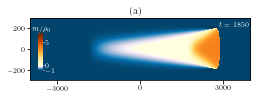

In [30]:
xlab=0.45
ylab=1.06

########### PDE Profile #########
ax=plt.subplot(111)
plt.text(s=r'$\mathrm{(a)}$', x=xlab, y=ylab, transform=plt.gca().transAxes)

t=1850
mat_pde_m=mat_PDE[t].m.values.reshape((12000,-1)).T
extent=[-mat_pde_m.shape[1]/2., mat_pde_m.shape[1]/2., -mat_pde_m.shape[0]/2., mat_pde_m.shape[0]/2. ]

pcm=plt.imshow(mat_pde_m, cmap=newcmp, aspect='auto', vmin=-1., vmax=7, extent=extent)

xtime=4300
ytime=320
plt.text(x=xtime, y=ytime, s=r'$t=%d$'%t, fontsize=7, color="w")

vx0=4500
plt.xticks([-vx0, 0, vx0], [r'$%d$'%np.int64(-2/3*vx0), r'$%d$'%0, r'$%d$'%np.int64(2/3*vx0)])

vy0=300
plt.yticks([-vy0, 0, vy0], [r'$%d$'%np.int64(-2/3*vy0), r'$%d$'%0, r'$%d$'%np.int64(2/3*vy0)])

inset_ax = inset_axes(ax,
                          height="61%", # set height
                          width="2.54%", # and width
                          loc=6,
                          bbox_to_anchor=(25,10,200,60)
                     )

cbar=plt.colorbar(pcm, fraction=0.2, ticks=[-1, 0, +5], cax = inset_ax, 
                  orientation='vertical',
                    drawedges=False)

cbar.outline.set_visible(False)
cbar.ax.tick_params(size=1, color='w')
cbar_yticks = plt.getp(cbar.ax.axes, 'yticklabels')
plt.setp(cbar_yticks, color='w')

cbar.ax.set_ylabel(r'${m}/{\rho_0}$', rotation=0, labelpad=-14, y=1.2, color="w", fontsize=7)


plt.subplots_adjust(hspace=0.4, wspace=0.25, left=0.09, right=0.99, top=0.84, bottom=0.13)

#plt.savefig('panela_fig2.pdf', dpi=400);

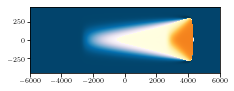

In [31]:
plt.imshow(mat_pde_m, cmap=newcmp, aspect='auto', vmin=-1., vmax=7, extent=extent)


In [32]:
np.savetxt('data_fig2_panela.dat', mat_pde_m)

In [89]:
t=1850
mat_pde_rho=mat_PDE[t].rho.values.reshape((12000,-1)).T


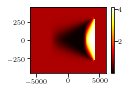

In [94]:
plt.imshow(mat_pde_rho, cmap='hot', aspect='auto', extent=extent)
plt.colorbar()

In [95]:
np.savetxt('data_rho_fig2_panela.dat', mat_pde_rho)

# Panel b

In [33]:
fig_width_pt = 123  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = fig_width_pt/1.4
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'xtick.labelsize': 7,
          'xtick.direction': 'out',
          'ytick.labelsize': 7,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

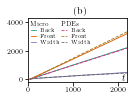

In [34]:
xlab=0.45
ylab=1.06

########### w(t) #########
plt.subplot(111)
lw=0.9
plt.text(s=r'$\mathrm{(b)}$', x=xlab, y=ylab, transform=plt.gca().transAxes)

plt.plot(list_t[1:], np.array(posback_micro-posback_micro[0]), label=r'${\rm Back}$', linewidth=lw)
plt.plot(list_t[1:], np.array(posfront_micro-posfront_micro[0]), label=r'${\rm Front}$', linewidth=lw)
plt.plot(list_t[1:], w_micro[1:], '-', label=r'${\rm Width}$', linewidth=lw)

plt.plot(list_t[1:], posback_pde-posback_pde[0], '--', label=r'${\rm Back}$', linewidth=lw)
plt.plot([],[])
plt.plot([],[])
plt.plot(list_t[1:], np.array(posfront_pde-posfront_pde[0]), '--', label=r'${\rm Front}$', linewidth=lw)
plt.plot(list_t[1:], np.array(w_pde)[1:], '--', label=r'${\rm Width}$', linewidth=lw)


fs=6
ycat=0.89
plt.annotate(s=r'${\rm Micro}$', xy=(0.02, ycat), fontsize=fs, xycoords='axes fraction')
plt.annotate(s=r'${\rm PDEs}$', xy=(0.33, ycat), fontsize=fs, xycoords='axes fraction')

leg=plt.legend(fontsize=fs-1, handlelength=1.1, loc=(0.01,0.55), labelspacing=0.2, ncol=2, columnspacing=0.5)
for line in leg.get_lines():
    line.set_linewidth(0.8)
plt.xlabel(r'$t$', labelpad=-19, x=0.96, rotation=0, zorder=100);
#plt.ylabel(r'$w$', labelpad=-25, y=0.83, rotation=0, zorder=100);

plt.xlim(0,2200)
plt.ylim(-200,4300)


plt.subplots_adjust(hspace=0.4, wspace=0.25, left=0.18, right=0.995, top=0.86, bottom=0.13)

#plt.savefig('panelb_fig2_v1.pdf', dpi=400);

In [37]:
data=np.zeros((list_t[1:].shape[0],7))

In [38]:
data[:,0]=list_t[1:]
data

array([[  50.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 100.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 150.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 200.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 250.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 300.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 350.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 400.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 450.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 500.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 550.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 600.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 650.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 700.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 750.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 800.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 850.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 900.,

In [39]:
data[:,1]=np.array(posback_micro-posback_micro[0])
data

array([[  50.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 100.,   56.,    0.,    0.,    0.,    0.,    0.],
       [ 150.,  110.,    0.,    0.,    0.,    0.,    0.],
       [ 200.,  164.,    0.,    0.,    0.,    0.,    0.],
       [ 250.,  217.,    0.,    0.,    0.,    0.,    0.],
       [ 300.,  271.,    0.,    0.,    0.,    0.,    0.],
       [ 350.,  323.,    0.,    0.,    0.,    0.,    0.],
       [ 400.,  374.,    0.,    0.,    0.,    0.,    0.],
       [ 450.,  426.,    0.,    0.,    0.,    0.,    0.],
       [ 500.,  477.,    0.,    0.,    0.,    0.,    0.],
       [ 550.,  530.,    0.,    0.,    0.,    0.,    0.],
       [ 600.,  581.,    0.,    0.,    0.,    0.,    0.],
       [ 650.,  636.,    0.,    0.,    0.,    0.,    0.],
       [ 700.,  687.,    0.,    0.,    0.,    0.,    0.],
       [ 750.,  742.,    0.,    0.,    0.,    0.,    0.],
       [ 800.,  794.,    0.,    0.,    0.,    0.,    0.],
       [ 850.,  844.,    0.,    0.,    0.,    0.,    0.],
       [ 900.,

In [40]:
data[:,2]=np.array(posfront_micro-posfront_micro[0])
data

array([[  50.,    0.,    0.,    0.,    0.,    0.,    0.],
       [ 100.,   56.,   70.,    0.,    0.,    0.,    0.],
       [ 150.,  110.,  144.,    0.,    0.,    0.,    0.],
       [ 200.,  164.,  217.,    0.,    0.,    0.,    0.],
       [ 250.,  217.,  292.,    0.,    0.,    0.,    0.],
       [ 300.,  271.,  367.,    0.,    0.,    0.,    0.],
       [ 350.,  323.,  442.,    0.,    0.,    0.,    0.],
       [ 400.,  374.,  517.,    0.,    0.,    0.,    0.],
       [ 450.,  426.,  592.,    0.,    0.,    0.,    0.],
       [ 500.,  477.,  667.,    0.,    0.,    0.,    0.],
       [ 550.,  530.,  742.,    0.,    0.,    0.,    0.],
       [ 600.,  581.,  817.,    0.,    0.,    0.,    0.],
       [ 650.,  636.,  892.,    0.,    0.,    0.,    0.],
       [ 700.,  687.,  967.,    0.,    0.,    0.,    0.],
       [ 750.,  742., 1042.,    0.,    0.,    0.,    0.],
       [ 800.,  794., 1118.,    0.,    0.,    0.,    0.],
       [ 850.,  844., 1192.,    0.,    0.,    0.,    0.],
       [ 900.,

In [41]:
data[:,3]=w_micro[1:]

In [42]:
data[:,4]=posback_pde-posback_pde[0]

In [43]:
data[:,5]=np.array(posfront_pde-posfront_pde[0])

In [44]:
data[:,6]=np.array(w_pde)[1:]

In [46]:
np.savetxt('data_fig2_panelb.dat', data, header='t posback_micro posfront_micro width_micro posback_pde posfront_pde width_pde')

# Panel c

In [47]:
fig_width_pt = 123  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = fig_width_pt/1.4
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'xtick.labelsize': 7,
          'xtick.direction': 'out',
          'ytick.labelsize': 7,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

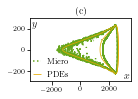

In [48]:
xlab=0.45
ylab=1.06
plt.subplot(111)

########### CONTOURS #########
t_pde=2200
t_micro=41*50

mat_micro_rho=rho_micro[t_micro]
mat_micro_m=m_micro[t_micro]
mat_pde_rho=rho_PDE[t_pde]
mat_pde_m=m_PDE[t_pde]
Xshift=-300


color_micro=plt.get_cmap('Dark2')(0.51)
color_PDE=plt.get_cmap('Dark2')(0.63)
plt.text(s=r'$\mathrm{(c)}$', x=xlab, y=ylab, transform=plt.gca().transAxes)

xmin=1000
xmax=8000
xlist = np.arange(xmin, xmax)
ylist = np.arange(0, 600)
X, Y = np.meshgrid(xlist, ylist)

avg_prof=uniform_filter(mat_micro_m, size=5, mode='constant')

Z = avg_prof[:,xmin:xmax]

cp = plt.contour(X, Y, Z, levels=[-1], colors=[color_micro], linestyles='dotted')
plt.clabel(cp, fontsize=1, inline=False, fmt='%d')
labels = [r'$\mathrm{Micro}$']
for i in range(len(labels)):
    cp.collections[i].set_label(labels[i])


xmin=1000
xmax=12000
xlist = np.arange(xmin, xmax)*(2./3)
ylist = np.arange(0, 900)*(2./3)
X, Y = np.meshgrid(xlist, ylist)
Z = mat_pde_m[:,xmin:xmax]
cp = plt.contour(X+Xshift, Y, Z, levels=[-1e-1], colors=[color_PDE], linewidths=0.8, linestyles='solid')

plt.clabel(cp, fontsize=1, inline=False, fmt='%d')
labels = [r'$\mathrm{PDEs}$']
for i in range(len(labels)):
    cp.collections[i].set_label(labels[i])

# #DENS
xmin=1000
xmax=8000
xlist = np.arange(xmin, xmax)
ylist = np.arange(0, 600)
X, Y = np.meshgrid(xlist, ylist)

avg_prof=uniform_filter(mat_micro_rho, size=5, mode='constant')

Z = avg_prof[:,xmin:xmax]
cp = plt.contour(X, Y, Z, levels=[12], colors=[color_micro])

xmin=1000
xmax=12000
xlist = np.arange(xmin, xmax)*(2./3)
ylist = np.arange(0, 900)*(2./3)
X, Y = np.meshgrid(xlist, ylist)
Z = mat_pde_rho[:,xmin:xmax]
cp = plt.contour(X+Xshift, Y, Z, levels=[1.2], colors=[color_PDE], linewidths=0.8)


plt.legend(fontsize=8, handlelength=1, loc=(0.,0.))
plt.xlabel(r'$x$', labelpad=-20, x=0.96, rotation=0, zorder=100);
plt.ylabel(r'$y$', labelpad=-27, y=0.83, rotation=0, zorder=100);

xmid=4500
list_xticks=[2500, 4500, 6500]
list_xshifted=np.array(list_xticks)-xmid
plt.xticks(list_xticks, [r"$%d$"%a for a in list_xshifted])

ymid=300
list_yticks=[100, 300, 500]
list_yshifted=np.array(list_yticks)-ymid
plt.yticks(list_yticks, [r"$%d$"%a for a in list_yshifted])

plt.xlim(1000, 8000)

plt.subplots_adjust(hspace=0.4, wspace=0., left=0.17, right=0.995, top=0.85, bottom=0.13)

#plt.savefig('panelc_fig2.pdf', dpi=400);

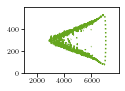

In [54]:
xmin=1000
xmax=8000
xlist = np.arange(xmin, xmax)
ylist = np.arange(0, 600)
X, Y = np.meshgrid(xlist, ylist)

avg_prof=uniform_filter(mat_micro_m, size=5, mode='constant')

Z = avg_prof[:,xmin:xmax]

cp = plt.contour(X, Y, Z, levels=[-1], colors=[color_micro], linestyles='dotted')

p = cp.collections[0].get_paths()[0]
v = p.vertices
x_iso_m_micro = v[:,0]
y_iso_m_micro  = v[:,1]

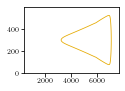

In [55]:

xmin=1000
xmax=12000
xlist = np.arange(xmin, xmax)*(2./3)
ylist = np.arange(0, 900)*(2./3)
X, Y = np.meshgrid(xlist, ylist)
Z = mat_pde_m[:,xmin:xmax]
cp = plt.contour(X+Xshift, Y, Z, levels=[-1e-1], colors=[color_PDE], linewidths=0.8, linestyles='solid')
p = cp.collections[0].get_paths()[0]
v = p.vertices
x_iso_m_pde = v[:,0]
y_iso_m_pde  = v[:,1]

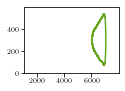

In [57]:
xmin=1000
xmax=8000
xlist = np.arange(xmin, xmax)
ylist = np.arange(0, 600)
X, Y = np.meshgrid(xlist, ylist)

avg_prof=uniform_filter(mat_micro_rho, size=5, mode='constant')

Z = avg_prof[:,xmin:xmax]
cp = plt.contour(X, Y, Z, levels=[12], colors=[color_micro])

p = cp.collections[0].get_paths()[0]
v = p.vertices
x_iso_rho_micro = v[:,0]
y_iso_rho_micro  = v[:,1]

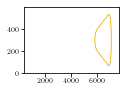

In [58]:

xmin=1000
xmax=12000
xlist = np.arange(xmin, xmax)*(2./3)
ylist = np.arange(0, 900)*(2./3)
X, Y = np.meshgrid(xlist, ylist)
Z = mat_pde_rho[:,xmin:xmax]
cp = plt.contour(X+Xshift, Y, Z, levels=[1.2], colors=[color_PDE], linewidths=0.8)

p = cp.collections[0].get_paths()[0]
v = p.vertices
x_iso_rho_pde= v[:,0]
y_iso_rho_pde  = v[:,1]

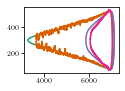

In [59]:
plt.plot(x_iso_m_pde, y_iso_m_pde)
plt.plot(x_iso_m_micro, y_iso_m_micro)

plt.plot(x_iso_rho_pde, y_iso_rho_pde)
plt.plot(x_iso_rho_micro, y_iso_rho_micro)

In [83]:
data_iso_m_pde=np.zeros((x_iso_m_pde.shape[0],2))
data_iso_m_pde[:,0]=x_iso_m_pde
data_iso_m_pde[:,1]=y_iso_m_pde
np.savetxt('data_iso_m_pde_fig2_panelc.dat', data_iso_m_pde, header='x y')

In [84]:
data_iso_rho_pde=np.zeros((x_iso_rho_pde.shape[0],2))
data_iso_rho_pde[:,0]=x_iso_rho_pde
data_iso_rho_pde[:,1]=y_iso_rho_pde
np.savetxt('data_iso_rho_pde_fig2_panelc.dat', data_iso_rho_pde, header='x y')

In [85]:
data_iso_m_micro=np.zeros((x_iso_m_micro.shape[0],2))
data_iso_m_micro[:,0]=x_iso_m_micro
data_iso_m_micro[:,1]=y_iso_m_micro
np.savetxt('data_iso_m_micro_fig2_panelc.dat', data_iso_m_micro, header='x y')

In [86]:
data_iso_rho_micro=np.zeros((x_iso_rho_micro.shape[0],2))
data_iso_rho_micro[:,0]=x_iso_rho_micro
data_iso_rho_micro[:,1]=y_iso_rho_micro
np.savetxt('data_iso_rho_micro_fig2_panelc.dat', data_iso_rho_micro, header='x y')